# MEDICAL COST PERSONAL INSURANCE PROJECT 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.simplefilter("ignore")
#import all the libraries which are necessary

In [7]:
medical_insurance=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
medical_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
#selecting top 5 heads of dataset
medical_insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
medical_insurance.shape

(1338, 7)

In [13]:
medical_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
medical_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
medical_insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


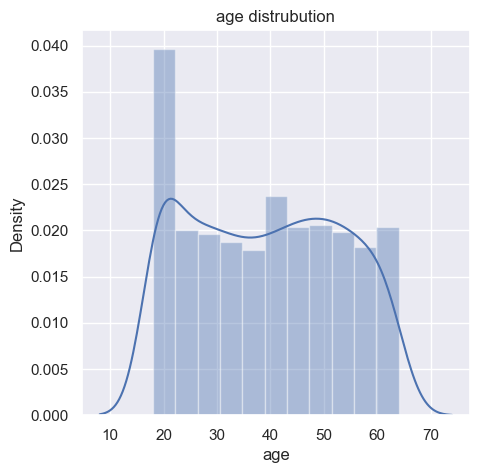

In [18]:
#distrubution od the age value as per dataset
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(medical_insurance['age']) #distplot tell us the distrubution
plt.title('age distrubution')
plt.show()

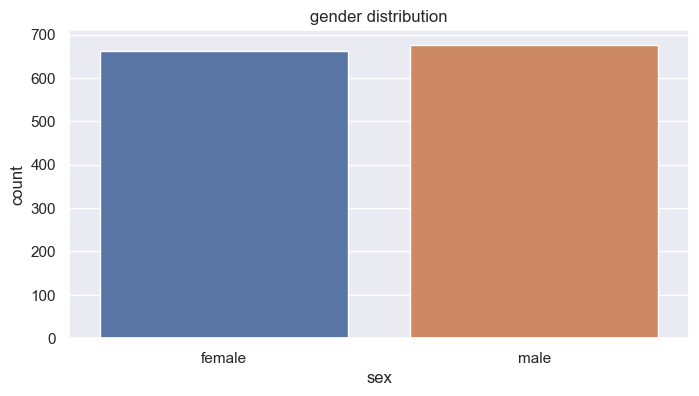

In [19]:
#gender distrubution using datasets
plt.figure(figsize=(8,4))
sns.countplot(x="sex", data=medical_insurance)
plt.title('gender distribution')
plt.show()

this show the gender distribution 

In [20]:
#using value count we can figure how many values are there in dataset
medical_insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

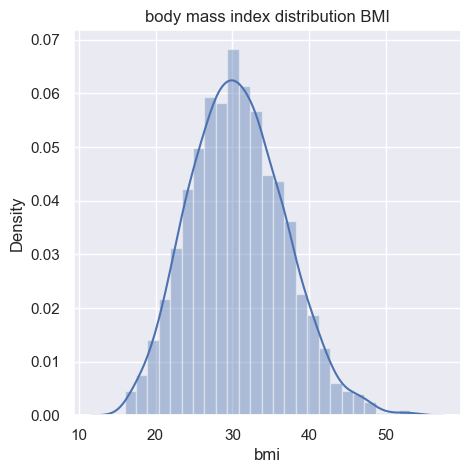

In [21]:
#body mass index distribution BMI
plt.figure(figsize=(5,5))
sns.distplot(medical_insurance['bmi'])
plt.title('body mass index distribution BMI')
plt.show()

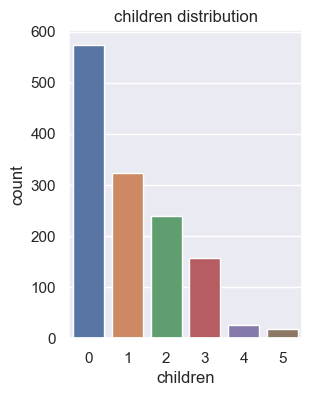

In [23]:
#we can use the countplot to find out children column
plt.figure(figsize=(3,4))
sns.countplot(x='children',data=medical_insurance)
plt.title('children distribution')
plt.show()

In [24]:
#checking the accurate numbers of children using valuecount
medical_insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

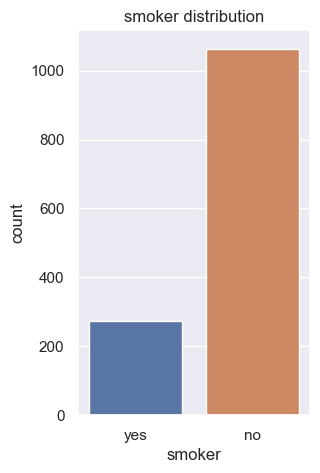

In [25]:
#figuring the number of smokers using count plot
sns.set()
plt.figure(figsize=(3,5))
sns.countplot(medical_insurance['smoker'])
plt.title('smoker distribution')
plt.show()

In [26]:
medical_insurance['smoker'].value_counts() #accurate number of smokers using valuecounting

no     1064
yes     274
Name: smoker, dtype: int64

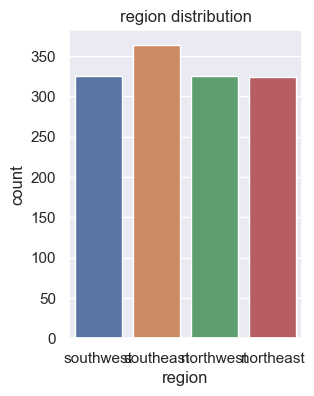

In [27]:
#regional distribution
plt.figure(figsize=(3,4))
sns.countplot(x='region', data=medical_insurance)
plt.title('region distribution')
plt.show()

In [28]:
medical_insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

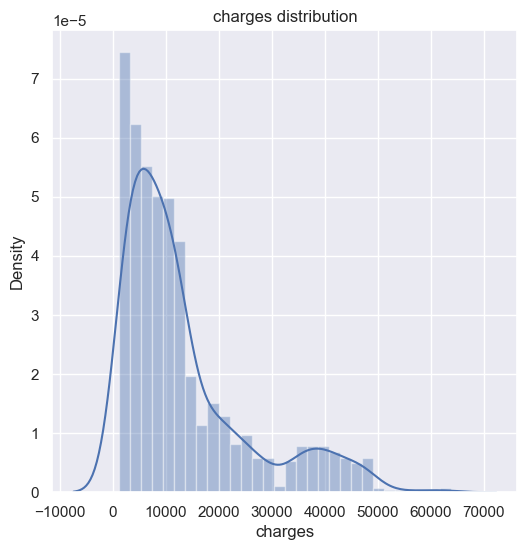

In [29]:
#body mass index distribution
plt.figure(figsize=(6,6))
sns.distplot(medical_insurance['charges'])
plt.title('charges distribution')
plt.show()

# PRE PROCESSING THE DATA

In [30]:
#ENCODING THE SEX COLUMN
medical_insurance.replace({'sex':{'male':0, 'female':1}},inplace=True)

#ENCODING SMOKERS COLUMN
medical_insurance.replace({'smoker':{'yes':0, 'no':1}},inplace=True)

#ENCODING REGION COLUMN
medical_insurance.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}},inplace=True)

In [31]:
medical_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


# SPLITING THE FEATURES ANS IN THE TAG

In [32]:
x=medical_insurance.drop(columns='charges',axis=1) #we are droping and swaving the charges to x column
y=medical_insurance['charges'] #we are saving the charges in Y

In [33]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [34]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

SPLITING THE DATA INTO TRAIN AND TEST

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [37]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


TRAINING THE MODEL

In [38]:
reg=LinearRegression()
reg

LinearRegression()

In [39]:
reg.fit(x_train,y_train)

LinearRegression()

# MODEL EVALUATION 

In [42]:
train_pred=reg.predict(x_train)

In [43]:
r2_train=metrics.r2_score(y_train, train_pred)
print('R Squared value :',r2_train)

R Squared value : 0.751505643411174


In [44]:
test_pred=reg.predict(x_test)
r2_test=metrics.r2_score(y_test,test_pred)
print('R Sqaured value :',r2_test)

R Sqaured value : 0.7447273869684077


# BUILDING THE PREDUCTIVE SYSTEM

In [45]:
input_data=(31,1,25.74,0,1,0)
#chaning the input data into array (numpy)
num_array=np.asarray(input_data)

#reshapping the array
reshaped_num_array=num_array.reshape(1,-1)

prediction=reg.predict(reshaped_num_array)
print(prediction)
print('The Insuarance is USD',prediction[0])

[3760.0805765]
The Insuarance is USD 3760.080576496048


# THE INSURANCE COST IS USD 3760.080576496048

THANK YOU :)